In [1]:
from rdkit import Chem

In [2]:
suppl = Chem.SDMolSupplier("../targets/qm9.sdf")

In [3]:
mol = suppl[0]

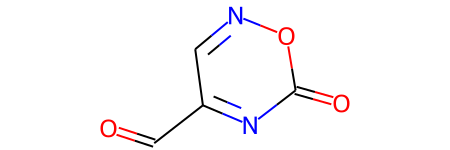

In [4]:
mol

In [5]:
adj = Chem.rdmolops.GetAdjacencyMatrix(mol)

In [6]:
adj

array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [7]:
import numpy as np

In [8]:
np.save("../connectivity/qm9_adj.npy", adj)

In [9]:
from glob import glob 

In [13]:
amons_qm9 = sorted(glob("../amons-qm9/*.sdf"))

In [15]:
mols = [Chem.SDMolSupplier(x)[0] for x in amons_qm9]

In [16]:
adjs = [Chem.rdmolops.GetAdjacencyMatrix(m) for m in mols]

In [20]:
labels = [x.split("/")[-1].split(".sdf")[0] for x in amons_qm9]

In [22]:
np.savez("../connectivity/qm9_amons_adjs.npz", adjs=adjs, labels=labels)

/home/puck/anaconda3/envs/rdkit/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [24]:
x = np.load("../connectivity/qm9_amons_adjs.npz")

In [25]:
list(x)

['adjs', 'labels']